# Dengue Prediction from Weather and Google Keyword Search by Machine Leaning

In [386]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
import random
import math
import time
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

Notebook Navigation:
1. Data Scraping
2. Dataset Overview, Data Preprocessing, and EDA
3. **Modeling, Tuning, Cost Based Analysis and Recommendation**

In [360]:
#dataset
df = pd.read_csv('../data/overall_data.csv')
c_df = pd.read_csv('../data/c_data.csv')
nw_df = pd.read_csv('../data/nw_data.csv')
ne_df = pd.read_csv('../data/ne_data.csv')
sw_df = pd.read_csv('../data/sw_data.csv')
se_df = pd.read_csv('../data/se_data.csv')

In [361]:
c_df.head()

,Date,Number Of Cases,Cluster Number,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2015-26,172,9,6.463333,4.476667,5.250000,6.023333,28.555819,31.257000,25.332417,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2015-28,248,9,3.800000,2.326190,2.461905,2.802381,29.038610,32.152976,26.605952,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2015-31,347,13,17.777381,11.326190,12.895238,14.111905,27.174624,30.322798,23.981310,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2015-32,395,15,1.291667,0.700000,0.754762,0.795238,28.297995,31.640298,25.999048,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2015-33,116,20,1.390476,1.102381,1.109524,1.109524,28.742857,31.969048,26.248036,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Modeling

### Baseline Model

In [362]:
y_mean = df['Number Of Cases'].mean()
np.sqrt(((df['Number Of Cases']-y_mean)**2).sum()/df.shape[0]) #rmse

140.54941857373487

### Using Linear Regression (disregarding the time series dependencies)

This model will disregard the time series dependency and treat every row as an input

In [363]:
dataset = [c_df,nw_df,ne_df,sw_df,se_df]
def train_test(df):
    features = ['Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)',
       'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)',
       'Mean Temperature (°C)', 'Maximum Temperature (°C)',
       'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)',
       'Max Wind Speed (km/h)', 'Dengue fever: (Singapore)',
       'headache: (Singapore)', 'Nausea: (Singapore)',
       'Mosquito bite: (Singapore)', 'Skin rash: (Singapore)', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'
    ]
    X = df[features]
    y = df['Number Of Cases']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2) #to make sure no data leakage
    return X_train, X_test, y_train, y_test

def linear_regression(df):
    X_train, X_test, y_train, y_test  = train_test(df)
    
    model_1_pipe = Pipeline([
        ('ss',StandardScaler()),
        ('lr',LinearRegression())
    ])
    model_1_pipe.fit(X_train,y_train);
    train_acc = model_1_pipe.score(X_train,y_train)
    test_acc = model_1_pipe.score(X_test,y_test)
    y_pred = model_1_pipe.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred,squared=False)
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(y_test, y_pred,s=5)
    ax.set_title('Linear Regression Prediction Distribution',fontsize=14)
    ax.set_xlabel('True Number of Cases',fontsize=10)
    ax.set_ylabel('Predicted Number of Cases',fontsize=10)
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="r")

    #output
    print('Linear Model Score-------')
    print(f'Train Score: {train_acc}; Test Score: {test_acc}')
    print(f'RMSE for this model: {rmse}')
    

    return train_acc,test_acc,rmse

#### Based on County

Linear Model Score-------
Train Score: 0.7943252038533855; Test Score: 0.5683118776105374
RMSE for this model: 67.87881032045229


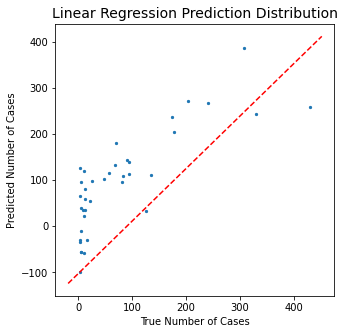

In [364]:
#central 

c_train_score, c_test_score, c_rmse = linear_regression(c_df)

Linear Model Score-------
Train Score: 0.5743972701004808; Test Score: 0.34780069925957735
RMSE for this model: 97.63765803494279


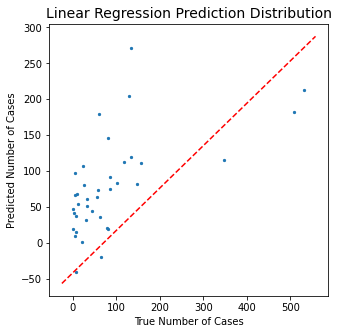

In [365]:
#northwest
nw_train_score, nw_test_score, nw_rmse = linear_regression(nw_df)

Linear Model Score-------
Train Score: 0.7777818016092128; Test Score: 0.7934085471752557
RMSE for this model: 50.896109324245664


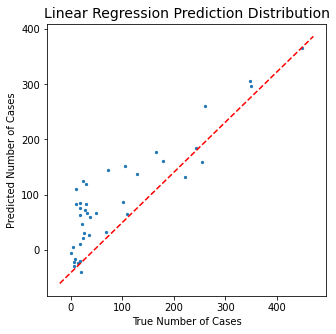

In [366]:
#northeast
ne_train_score, ne_test_score, ne_rmse = linear_regression(ne_df)

Linear Model Score-------
Train Score: 0.7572663313283312; Test Score: 0.3495828796594196
RMSE for this model: 57.639175813414624


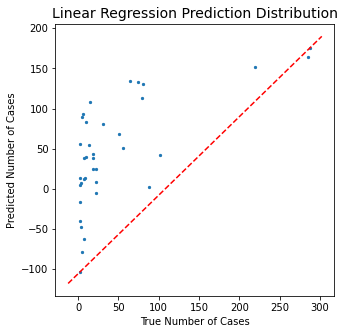

In [367]:
#southwest
sw_train_score, sw_test_score, sw_rmse = linear_regression(sw_df)

Linear Model Score-------
Train Score: 0.8548675930728233; Test Score: 0.7871043657191469
RMSE for this model: 106.2031610264313


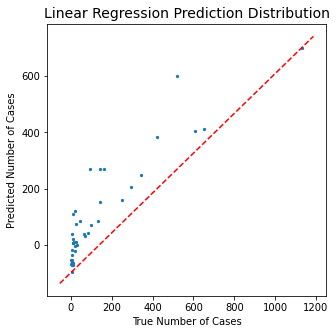

In [368]:
#southeast
se_train_score, se_test_score, se_rmse = linear_regression(se_df)

#### Overall Data

In [369]:
from sklearn.preprocessing import OneHotEncoder
def encoding(df,col):
    #one hot encode the month to be a feature
    enc = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'Month' column 
    enc_df = pd.DataFrame(enc.fit_transform(df[[col]]).toarray(),columns=enc.get_feature_names_out())

    #merge one-hot encoded columns back with original DataFrame
    final_df = pd.concat([df.reset_index(),enc_df],axis=1)
    final_df.drop(columns = col,inplace=True)
    final_df.set_index('Date',inplace=True)
    return final_df

df = encoding(df,'Month')
df = encoding(df,'County')

Linear Model Score-------
Train Score: 0.5365282209480159; Test Score: 0.5022126060740288
RMSE for this model: 81.71082930922368


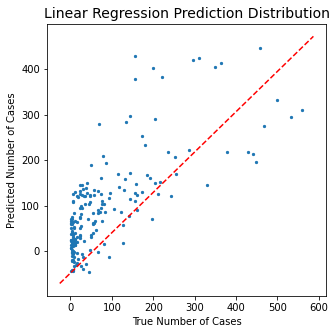

In [370]:
overall_train_score, overall_test_score, overall_rmse = linear_regression(df)

Compared to baseline model, observed an improvement of RMSE on both the overall and separated model based on county. Although overall data accuracy lies at 53%, we observed signi

## Long Short Term Mermory (LSTM)
Using deep learning to try forecasting number of dengue case

#### Central County

In [516]:
c_train = c_df.drop(columns=['Date']).iloc[:150]
c_test = c_df.drop(columns=['Date']).iloc[150:]
mm = StandardScaler()
c_train_sc = mm.fit_transform(c_train)
c_test_sc = mm.transform(c_test)


In [517]:
n_past = 4
n_future = 1
trainX = []
trainY = []
testX = []
testY = []

#transforming dta to a 3 dimensional moving data as per required by our model
for i in range(n_past, len(c_train_sc)- n_future + 1):
    trainX.append(c_train_sc[i - n_past:i,1:c_train_sc.shape[1]])
    trainY.append(c_train_sc[(i + n_future-1): (i + n_future),0])

trainX,trainY = np.array(trainX),np.array(trainY) #taking past 4 week data to predict the next (5th one) and so one
for i in range(n_past, len(c_test_sc)- n_future + 1):
    testX.append(c_test_sc[i - n_past:i,1:c_test_sc.shape[1]])
    testY.append(c_test_sc[(i + n_future-1): (i + n_future),0])
testX,testY = np.array(testX),np.array(testY)
print(f'train X shape = {trainX.shape}')
print(f'train Y shape = {trainY.shape}') #4rows missing 
print(f'test X shape = {testX.shape}')
print(f'test Y shape = {testY.shape}') #4rows missing 

train X shape = (146, 4, 27)
train Y shape = (146, 1)
test X shape = (35, 4, 27)
test Y shape = (35, 1)


In [518]:
model = Sequential()
model.add(LSTM(64,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True)) #would like to have next LSTM to feed this output
model.add(LSTM(32,activation='relu',return_sequences=False))
#model.add(Dropout(0.2)) 
model.add(Dense(1))

opt = Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_47 (LSTM)              (None, 4, 64)             23552     
                                                                 
 lstm_48 (LSTM)              (None, 32)                12416     
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 36,001
Trainable params: 36,001
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
15/15 [==============================] - 9s 42ms/step - loss: 0.6722 - val_loss: 8.2576
Epoch 2/20
15/15 [==============================] - 0s 20ms/step - loss: 0.3863 - val_loss: 5.3561
Epoch 3/20
15/15 [==============================] - 0s 12ms/step - loss: 0.2043 - val_loss: 4.8228
Epoch 4/20
15/15 [==============================] - 0s 12ms/step - loss: 0.1092 - val_loss: 4.2181
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0589 - val_loss: 3.7071
Epoch 6/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0333 - val_loss: 3.9287
Epoch 7/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0261 - val_loss: 3.7467
Epoch 8/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0223 - val_loss: 3.6734
Epoch 9/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0198 - val_loss: 4.0386
Epoch 10/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0197 - val_loss: 4.0117
Epoch 11/20
15

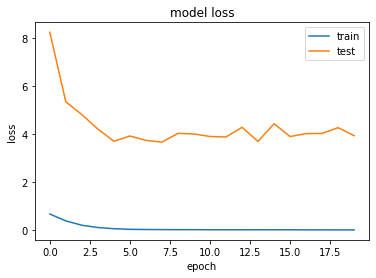

In [519]:
history = model.fit(trainX,trainY, validation_data=(testX, testY),epochs=20,batch_size=10, verbose=1)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [520]:
testX.shape

(35, 4, 27)

In [521]:
# make a prediction
y_pred = model.predict(testX)

2/2 [==============================] - 0s 16ms/step


In [525]:
prediction_copies = np.repeat(y_pred, 28, axis=-1)
prediction_copies.shape

(35, 28)

In [526]:
inv_yhat = mm.inverse_transform(prediction_copies) #inversing it back to actual number
inv_yhat.shape

(35, 28)

In [530]:
inv_yhat = pd.DataFrame(inv_yhat)
inv_yhat.iloc[0].head()

0    68.752747
1     8.720560
2     7.270863
3     3.975279
4     4.915041
Name: 0, dtype: float32

In [529]:
c_pred = pd.concat([c_test['Number Of Cases'].iloc[4:].reset_index(), inv_yhat.iloc[:,0].reset_index()], axis=1).drop(columns='index')
c_pred.rename(columns={'Number Of Cases':'Actual',0:'Prediction'})
mean_squared_error(c_test['Number Of Cases'].iloc[4:],inv_yhat.iloc[:,0],squared=False)

169.0134307750157

It seems that RMSE score is significantly worst from our Linear Regression and baseline model for Central County. In this case, we will stop exploring on LSTM model. 

LSTM predicts future value based on previous sequential data where it recognizes patterns in data sequence. However, complex model such as LSTM and GRU **needs a lot more data to capture those patterns** (190 weeks data points are not sufficient)

## Cost Based Analysis

If you suspect yourself to have prolonged fever / potential dengue, one must do:
1. See a doctor ($20-$100, will assume the middle cost of $50)
2. Get a blood test done to assess platelet level and blood concentration ($70-80 at GP and $50-60 at Poly, will take $70)
3. If blood platelet < 80,000, need to go to hospital (typically last 2-7 days, $700-1000 for Ward B: assuming we take 5 days $3500)

Total Bill for Dengue: $3670

Comparing to estimated cost for fogging in a county at aproximately $60000 (based on $250/ acre pricing), if the county is forecasted to have >17 cases based on our model, we will recommend fogging to be done in that location.


## Recommendation

Although RMSE improvement is observed compared to our baseline model, our best model (Linear Regression) is far from perfect at 53% accuracy (RMSE ~82), we can recommend these additional features from other goverment body such as:
1. Get Singapore population data by week 
2. List of stagnant water in Singapore
3. Get the age of all HDB: older HDB, have more porous structure, can be a place for mosquito to breed

Therefore, we would like to recommend NEA to spray more on **July-October and Dec-Feb** period as there is a trend of increase on these period and use forecasted weather to predict the following week case and give priority to those with **>17 cases predicted.**